# Regresión NO lineal

Cuadráticas, exponenciales, logarítmicas...

Se recomienda transformar la var para ajustarnos a lo que queremos, para saber si es lineal o no, podemos empezar con un plot

**Explicación R. Lineal ->** https://www.notion.so/Regresi-n-lineal-39b5e113aa01468a8963932b5ec26123

**Librerías, Funciones:**
- *Pandas* -> .read_csv, .DataFrame()
- *Python* -> .dropna(), .fillna(), .mean(), fit_transformation
- *Numpy* -> .sum, .mean, .sqrt
- *Matplotlib* -> .plot, .xlabel, .ylabel, .title
- *from sklearn.linear_model import LinearRegression* -> LinearRegression(), .intercept_, .coef_, .score(), fit(),.predict
- *from sklearn.preprocessing import PolynomialFeatures* -> PolinomialFeatures
- *from sklearn import linear_model* -> .score,.fit

**Índice:**

0. Preparación **previa**
1. Representamos la relación entre 2 vars.
2. Creamos un modelo:

    2.1. Modelo de regresión lineal
    
    2.2. Modelo de regresión cuadrática
    
    2.3. Modelo de regresión lineal y cuadrática    
    
- Extra: minifunción para calcular errores:

# 0. Preparación previa

In [29]:
%config IPCompleter.greedy=True  #Para permitir el autocompletado en Jupyter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #Para calcular el lm

#Para polinomios:
from sklearn.preprocessing import PolynomialFeatures #En el caso de tener polinomios
from sklearn import linear_model

In [30]:
mainpath = "/Users/irene/Documents/GitHub/python-ml-course/datasets"  #Ruta ficheros
filename = "auto/auto-mpg.csv" #Fichero a abrir
fullpath = mainpath + "/" + filename #Ruta completa

df = pd.read_csv(fullpath)
df.head(3)

#2 vars categóricas -> gender & city tier

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


In [31]:
 df.shape

(406, 9)

# 1. Representamos la relación entre 2 vars.

Para visualizar la forma de su relación: tal vez exponencial o cuadrática.

Text(0.5, 1.0, 'CV vs MPG')

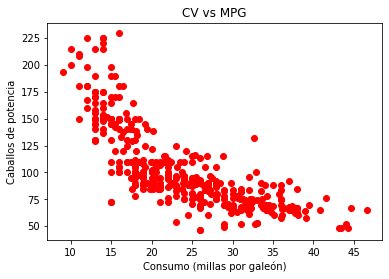

In [32]:
#Quitamos las filas con na
df["mpg"] = df["mpg"].dropna()  
df["horsepower"] = df["horsepower"].dropna() 

#Representamos
plt.plot(df["mpg"],df["horsepower"],"ro")

#Etiquetamos
plt.xlabel("Consumo (millas por galeón)")
plt.ylabel("Caballos de potencia")
plt.title ("CV vs MPG")

# 2. Creamos un modelo

## 2.1. Modelo de regresión lineal

Vamos a suponer que ambas vars. tienen una relación lineal, a ver si se ajusta:

* **mpg = a + b * horsepower**

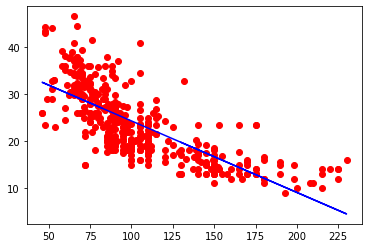

In [33]:
#Establecemos las vars. predictoras
X = df["horsepower"].fillna(df["horsepower"].mean())
Y = df["mpg"].fillna(df["mpg"].mean())

#Columna a Array -> LinearRegression espera un array, no una columna
X_Array = pd.DataFrame(X) 

#Creamos el modelo
lm = LinearRegression()
lm.fit(X_Array,Y)

#Representamos la predicción vs. datos actuales
plt.plot(X,Y,"ro")
plt.plot(X, lm.predict(X_Array), color="blue")

In [34]:
R2 = lm.score(X_Array, Y) 

SSD = np.sum((Y - lm.predict(X_Array))**2)
RSE = np.sqrt(SSD/(len(X_Array)-1))
y_mean=np.mean(Y)
error = (RSE/y_mean)*100

print("El R2 es: " + str(R2)) #Regular
print("")
print("El SSD es: " + str(SSD))
print("El RSE es: " + str(RSE))
print("La media de consumo es: " + str(y_mean))
print("El Error es: " + str(error) + "%") #21%, not bad

El R2 es: 0.574653340645025

El SSD es: 10315.75196006092
El RSE es: 5.046879480825511
La media de consumo es: 23.51457286432162
El Error es: 21.46277336163346%


## 2.2. Modelo de regresión cuadrática

Probamos con un modelo cuadrático (en lugar de lineal):

* **mpg = a + b * horsepower^2** 

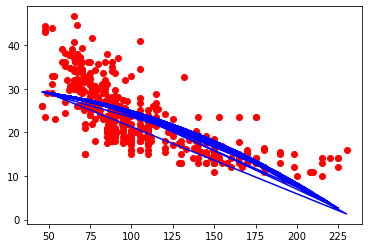

In [35]:
#Establecemos las vars. predictoras
X_Array2 = X_Array ** 2

#Creamos el modelo
lm2 = LinearRegression() 
lm2.fit(X_Array2,Y)

#Representamos la predicción vs. datos actuales
plt.plot(X,Y,"ro")
plt.plot(X, lm2.predict(X_Array2), color="blue")

In [36]:
R2 = lm.score(X_Array2, Y) 

SSD2 = np.sum((Y - lm2.predict(X_Array2))**2)
RSE2 = np.sqrt(SSD2/(len(X_Array2)-1))
error2 = (RSE2/y_mean)*100

print("El R2 es: " + str(R2)) #Peor
print("")
print("El SSD es: " + str(SSD2))
print("El RSE es: " + str(RSE2))
print("La media de consumo es: " + str(y_mean))
print("El Error es: " + str(error2) + "%") #23%, peor, no es cuadrático

El R2 es: -96889.34744164819

El SSD es: 12490.350340501926
El RSE es: 5.553410772769817
La media de consumo es: 23.51457286432162
El Error es: 23.6168898529981%


## 2.3. Modelo de regresión lineal y cuadrática

Probamos con un modelo lineal y cuadrático:

* **mpg = a + b * horsepower + c * horsepower^2** 


**El modelo lineal obtenido por regresión es:**

- mpg = 55.02619244708036 -0.43404318*horsepower + 0.00112615^2

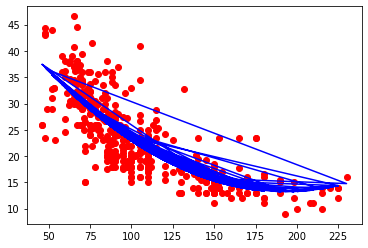

In [37]:
#Establecemos las vars. predictoras

poly = PolynomialFeatures(degree=2) #Polinomio de grado 2
X_Array = poly.fit_transform(X_Array)

#Creamos el modelo
lm3 = linear_model.LinearRegression()
lm3.fit(X_Array, Y)

#Representamos la predicción vs. datos actuales
plt.plot(X,Y,"ro")
plt.plot(X, lm3.predict(X_Array), color="blue")

In [38]:
#Obtenemos los parámetros del modelo
print("El valor de alpha es: " + str(lm3.intercept_)) 
print("El valor de R2 es: " + str(lm3.score(X_Array,Y))) #El mayor R^2 que hemos obtenido
print("El valor de las betas es: " + str(lm3.coef_))

El valor de alpha es: 55.02619244708036
El valor de R2 es: 0.6439066584257469
El valor de las betas es: [ 0.         -0.43404318  0.00112615]


# Extra: minifunción para calcular errores:

In [39]:
#Hacemos una función para calcular los errores:

def Regression_Validation(X_Array, Y, Y_Pred):
    SSD = np.sum((Y - Y_Pred)**2)
    RSE = np.sqrt(SSD/(len(X_Array)-1))
    y_mean = np.mean(Y)
    error = (RSE/y_mean)*100
    print("El SSD es: " + str(SSD))
    print("El RSE es: " + str(RSE))
    print("La media de Y es: " + str(y_mean))
    print("El Error es: " + str(error) + "%")